In [4]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sk
from sklearn import tree
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_predict


In [5]:
def scaleData(dataFrame,flag):
    df = dataFrame.copy()

    for var in df:
        mean = df[var].mean()
        std = df[var].std()
        l1 = (df[var].abs()).sum()

        if(flag == 1):
            df[var] = (df[var]-mean)/std
        else:
            df[var] = df[var]/l1

    return df

In [8]:
dfProbeA = pd.read_csv('./probeA.csv', header = 0)
dfScProbeA = scaleData(dfProbeA, 1)

dfProbeB = pd.read_csv('./probeB.csv', header = 0)
dfScProbeB = scaleData(dfProbeB, 1)

dfClassA = pd.read_csv('./classA.csv', header = 0)


In [9]:
featureCols = ['c1','c2','c3','m1','m2','m3','n1','n2','n3','p1','p2','p3']
dfTrain = dfProbeA[featureCols]
dfTarget = dfProbeA[['TNA']]

dfSc = scaleData(dfTrain, 2)


In [6]:
k_range = range(1, 5)
k_scores = []
for k in k_range:
    dTree = tree.DecisionTreeRegressor(max_features = k, max_depth = 1)
    scores = cross_val_score(dTree, dfSc, dfTarget, cv=10, scoring='r2')
    k_scores.append(scores.mean())
    print (k, scores.mean())
print(np.amin(k_scores))

1 0.00943470154694
2 0.0849125374575
3 0.101242769456
4 0.267864140953
0.00943470154694


In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfSc, dfTarget, test_size = .1, random_state=0)


0.533308724428


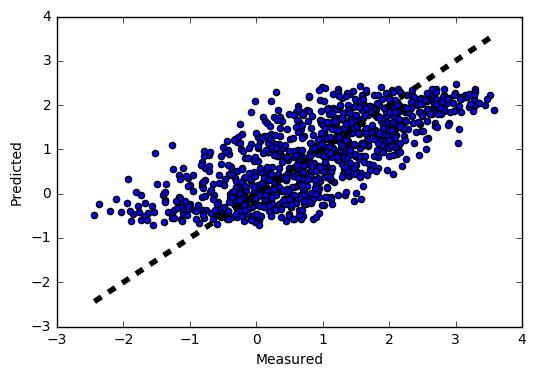

In [6]:
fold = 10

ridge = sk.RidgeCV(alphas = np.logspace(-4, -0.5, 30))
scores = cross_val_score(ridge, dfSc, dfTarget, cv=fold, scoring='r2')
predict = cross_val_predict(ridge, dfSc, dfTarget, cv=fold)

print (scores.mean())
fig, ax = plt.subplots()
ax.scatter(dfTarget, predict)
ax.plot([dfTarget.min(), dfTarget.max()], [dfTarget.min(), dfTarget.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



In [9]:


lasso = sk.LassoCV(alphas=np.arange(-20,20,0.05))
lasso.fit(dfScProbeA, dfClassA)
print (lasso.alpha_, lasso.coef_)



2.84217094304e-13 [  2.83721656e-01  -1.08913679e-03  -7.26627185e-03   2.12288030e-02
  -1.12542364e-02   1.22678519e-02   1.17584052e-02   6.29618787e-02
  -1.13789969e-02   3.26000197e-02  -2.47028139e-03   1.32439218e-01
   1.83365899e-04]


/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.38306101197
0.441781022462


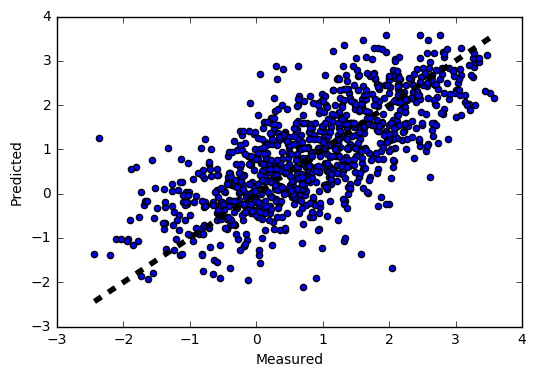

In [20]:
dTree = tree.DecisionTreeRegressor(max_features = 3)
scores = cross_val_score(dTree, dfSc, dfTarget, cv=fold, scoring='r2')
print (scores.mean())

predict = cross_val_predict(dTree, dfSc, dfTarget, cv=fold)
print(r2_score(dfTarget, predict)) 
fig, ax = plt.subplots()
ax.scatter(dfTarget, predict)
ax.plot([dfTarget.min(), dfTarget.max()], [dfTarget.min(), dfTarget.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



np.savetxt("myshame.csv", predict, delimiter=",")


In [ ]:
dTree = tree.DecisionTreeRegressor(max_depth = 1)
dTree.fit(dfSc, dfTarget)
predictedSet = (dTree.predict(dfScProbeB))



In [ ]:
#predicting

In [ ]:
#print (y_test)
predictedSet = (ridge.predict(X_test))
totalLoss = 0

#print (y_test, predictedSet)
#print(y_test['TNA'].iloc[299])
#print (predictedSet[299])
for index, list in enumerate(predictedSet):
    #print (predictedSet[x])
    #print (y_test['TNA'].iloc[index], '---', list[0])
    loss = (list -  y_test['TNA'].iloc[index]) ** 2 
    totalLoss = totalLoss + loss
print (totalLoss/len(predictedSet))

In [ ]:
predictedSet = (lasso.predict(X_test))
totalLoss = 0
for index, list in enumerate(predictedSet):
    loss = (list -  y_test['TNA'].iloc[index]) ** 2 
    totalLoss = totalLoss + loss    
print (totalLoss/len(predictedSet))

In [ ]:
dTree = tree.DecisionTreeRegressor(max_features = 3)
dTree.fit(X_train, y_train)

predictedSet = (dTree.predict(X_test))
totalLoss = 0
for index, list in enumerate(predictedSet):
    loss = (list -  y_test['TNA'].iloc[index]) ** 2 
    totalLoss = totalLoss + loss    
print (totalLoss/len(predictedSet))




In [ ]:
k = 10
kf = KFold(len(dfSc),k)
sum_accuracy = 0

    #KFold returns a list containing the training instances and testing instances in each list item
    #will have 10 items in the list if using 10-fold CV
for train, test in kf:
    trainingDf = dfSc.iloc[train].copy()
    testingDf = dfSc.iloc[test].copy()
    trainingDfTarget = dfTarget.iloc[train].copy()
    testingDfTarget = dfTarget.iloc[test].copy()

    #training = training.drop(8, 1)

    #trainingDf = scaleData(trainingDf,1)
    #testingDf = scaleData(testingDf, 1)

    target = trainingDfTarget.as_matrix()
    training = trainingDf.as_matrix()
    testingTarget = testingDfTarget.as_matrix()
    testing = testingDf.as_matrix()
    target = target.squeeze()

    dTree = tree.DecisionTreeRegressor(max_features = 3)
    dTree.fit(training, target)

    predictVal = ((dTree.predict(testing)))
    #predictProb =  knn_model.predict_proba(testing)
    #confusion = metrics.confusion_matrix(testingTarget, predictVal)
    #print (confusion)
    #TP = confusion[1,1]
    #TN = confusion[0,0]
    #FP = confusion[0,1]
    #FN = confusion[1,0]
    #print (TN/float(TN+FP))

    #print (metrics.recall_score(testingTarget, predictVal))
    #y_pred_prob = knn_model.predict_proba(testing)[:, 1]
    scores = r2_score(testingDfTarget, predictVal) 
    print ("Score", scores)
    #auc = (metrics.roc_auc_score(testingTarget, y_pred_prob))
    #auccracy_score
    sum_accuracy = sum_accuracy + scores


print (sum_accuracy/k)

In [ ]:
k = 10
kf = KFold(len(dfSc),k)
sum_accuracy = 0

    #KFold returns a list containing the training instances and testing instances in each list item
    #will have 10 items in the list if using 10-fold CV
for train, test in kf:
    trainingDf = dfSc.iloc[train].copy()
    testingDf = dfSc.iloc[test].copy()
    trainingDfTarget = dfTarget.iloc[train].copy()
    testingDfTarget = dfTarget.iloc[test].copy()

    #training = training.drop(8, 1)

    #trainingDf = scaleData(trainingDf,1)
    #testingDf = scaleData(testingDf, 1)

    target = trainingDfTarget.as_matrix()
    training = trainingDf.as_matrix()
    testingTarget = testingDfTarget.as_matrix()
    testing = testingDf.as_matrix()
    target = target.squeeze()

    ridge = sk.RidgeCV(alphas = np.logspace(-4, -0.5, 30))
    ridge.fit(training, target)

    predictVal = ((ridge.predict(testing)))
    #predictProb =  knn_model.predict_proba(testing)
    #confusion = metrics.confusion_matrix(testingTarget, predictVal)
    #print (confusion)
    #TP = confusion[1,1]
    #TN = confusion[0,0]
    #FP = confusion[0,1]
    #FN = confusion[1,0]
    #print (TN/float(TN+FP))

    #print (metrics.recall_score(testingTarget, predictVal))
    #y_pred_prob = knn_model.predict_proba(testing)[:, 1]
    scores = r2_score(testingDfTarget, predictVal) 
    print ("Score", scores)
    #auc = (metrics.roc_auc_score(testingTarget, y_pred_prob))
    #auccracy_score
    sum_accuracy = sum_accuracy + scores.mean()


print (sum_accuracy/k)

In [15]:
lasso = sk.LassoCV(alphas=np.arange(-0.1,0.01,0.0005))
scores = cross_val_score(lasso, dfSc, dfTarget.values.ravel(), cv=10, scoring='r2')
print (scores.mean())


/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.533292384661


/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/opt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [13]:


lasso = sk.RidgeCV(alphas=np.arange(-0.1,0.01,0.0005))
scores = cross_val_score(lasso, dfSc, dfTarget.values.ravel(), cv=10, scoring='r2')
print (scores.mean())


0.53311616701


In [ ]:
dTree = tree.DecisionTreeRegressor(max_features = 3)
scores = cross_val_score(dTree, dfSc, dfTarget.values.ravel(), cv=10, scoring='r2')
print (scores, scores.mean())